In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# Load the data into a pandas dataframe
df2011 = pd.read_csv('2011_rankings.csv')
df2012 = pd.read_csv('2012_rankings.csv')
df2013 = pd.read_csv('2013_rankings.csv')
df2014 = pd.read_csv('2014_rankings.csv')
df2015 = pd.read_csv('2015_rankings.csv')
df2016 = pd.read_csv('2016_rankings.csv')
df2017 = pd.read_csv('2017_rankings.csv')
df2018 = pd.read_csv('2018_rankings.csv')
df2019 = pd.read_csv('2019_rankings.csv')
df2020 = pd.read_csv('2020_rankings.csv')
df2021 = pd.read_csv('2021_rankings.csv')
df2022 = pd.read_csv('2022_rankings.csv')
df2023 = pd.read_csv('2023_rankings.csv')

In [79]:
# CombineScores.ipynb all the dataframes into a single dataframe
frames = [df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022, df2023]
df = pd.concat(frames)

In [80]:
print(df.columns)

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_research', 'scores_research_rank', 'scores_citations',
       'scores_citations_rank', 'location', 'aliases', 'subjects_offered',
       'closed', 'unaccredited', 'stats_number_students',
       'stats_student_staff_ratio', 'stats_pc_intl_students',
       'stats_female_male_ratio'],
      dtype='object')


In [81]:
# Preprocess the stats_female_male_ratio column
df['stats_female_male_ratio'] = df['stats_female_male_ratio'].str.replace('[^\d:./-]', '')
df[['female_ratio', 'male_ratio']] = df['stats_female_male_ratio'].str.split(':', expand=True)
df['female_ratio'] = pd.to_numeric(df['female_ratio'], errors='coerce')
df['male_ratio'] = pd.to_numeric(df['male_ratio'], errors='coerce')

/tmp/ipykernel_27451/375656293.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['stats_female_male_ratio'] = df['stats_female_male_ratio'].str.replace('[^\d:./-]', '')


In [82]:
# Drop rows with missing values in the 'rank' column
df = df[pd.to_numeric(df['rank'], errors='coerce').notnull()]

In [83]:
df['rank'] = pd.to_numeric(df['rank'], errors='coerce')


Text(0, 0.5, 'Female to Male Ratio')

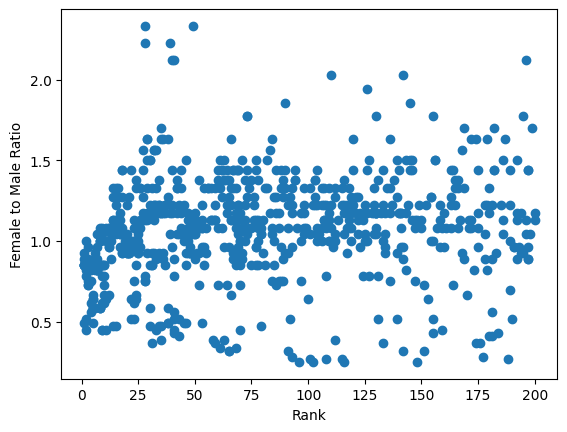

In [85]:
# Create a scatter plot of rank vs female to male ratio
plt.scatter(df['rank'], df['female_ratio'] / df['male_ratio'])
plt.xlabel('Rank')
plt.ylabel('Female to Male Ratio')

In [84]:
# Calculate the correlation coefficient
corr = df['rank'].corr(df['female_ratio'] / df['male_ratio'])
print('Correlation Coefficient:', corr)

Correlation Coefficient: 0.16219856670053026
